https://www.telesens.co/2018/07/26/understanding-roofline-charts/

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
#measurements = {'question_N': (Bandwidth,Throughput, Color)}
measurements = {
"c1_1e6": (0.000228, 0.057117, 'b'),
"c1_3e8": (0.067227, 0.336134, 'b'),
"c2_1e6": (0.000912, 0.228050, 'b'),
"c2_3e8": (0.273504, 1.367521, 'b'),
"c3_1e6": (0.000000127944, 0.00003198, 'b'),
"c3_3e8": (0.000000116, 0.000000583, 'b'),
"c4_1e6": (2.520e-05, 0.0063018, 'b'),
"c4_3e8": (0.00130, 0.0065414, 'b'),
"c5_1e6": (0.81659, 0.20414, 'b'),
"c5_3e8": (4.363226, 1.0908, 'b')
}

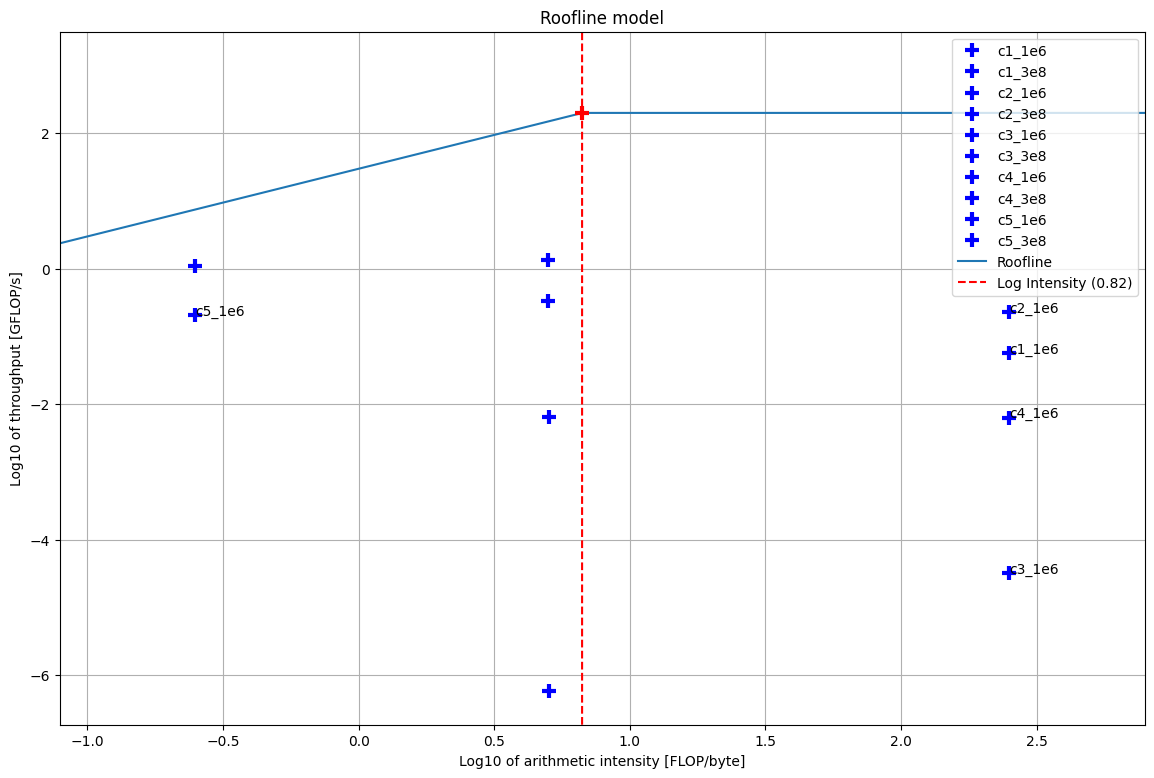

In [16]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(1, 1, 1)
fl = math.log10(200)
bw = math.log10(30)
ai = fl - bw
min_x, max_x = 0, 2
min_y, max_y = 0, 3

ax.set_title("Roofline model")
ax.set_xlabel('Log10 of arithmetic intensity [FLOP/byte]')
ax.set_ylabel('Log10 of throughput [GFLOP/s]')
for key in measurements:
    values = measurements[key]
    log_bw = math.log10(values[0])
    log_th = math.log10(values[1])
    log_ai = log_th - log_bw
    
    max_x = max(max_x, log_ai)
    min_x = min(min_x, log_ai)
    
    max_y = max(max_y, log_th)
    min_y = min(min_y, log_th)
    if '1e6' in key:
        ax.annotate(key, (log_ai, log_th))
    ax.plot(log_ai, log_th, f'{values[2]}+', markersize=10, markeredgewidth=3, label=f"{key}")

min_x -=0.5
max_x +=0.5
min_y -=0.5
max_y +=0.5

x = np.linspace(min_x, max_x, num=10000)
y = np.linspace(min_y, max_y, num=10000)
ax.plot(x, [min(x+bw, fl) for x in x], label=f"Roofline")
ax.plot([ai for y in y], y, 'r--', label=f"Log Intensity ({ai:.2f})")
ax.plot(ai, fl, 'r+', markersize=10, markeredgewidth=3)

ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.legend(loc='upper right')
ax.grid()
plt.show()